In [11]:
%pylab inline
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import gower
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, set_link_color_palette
from pycaret.clustering import *
from ipywidgets import *
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [12]:
#df = pd.read_excel("/home/dsg/Escritorio/CCA2024/DATA/cuerpos_preprocessed.xlsx",sheet_name='encoded_int', engine='openpyxl')
df = pd.read_csv("./intermediate_data/datos_preprocesados.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Unnamed: 0       578 non-null    int64
 1   Coccion          578 non-null    int64
 2   T_desgrasante    578 non-null    int64
 3   Composicion      578 non-null    int64
 4   Densidad         578 non-null    int64
 5   Textura          578 non-null    int64
 6   Grosor₍mm)       578 non-null    int64
 7   Tamaño(cm)       578 non-null    int64
 8   Acabado_Interno  578 non-null    int64
 9   Acabado_Externo  578 non-null    int64
 10  Dureza           578 non-null    int64
 11  Ahumado          578 non-null    int64
 12  Tecnica          578 non-null    int64
 13  Elemento₁        578 non-null    int64
 14  Localizacion     578 non-null    int64
 15  Baño             578 non-null    int64
 16  Engobe           578 non-null    int64
dtypes: int64(17)
memory usage: 76.9 KB


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Coccion          578 non-null    int64
 1   T_desgrasante    578 non-null    int64
 2   Composicion      578 non-null    int64
 3   Densidad         578 non-null    int64
 4   Textura          578 non-null    int64
 5   Grosor₍mm)       578 non-null    int64
 6   Tamaño(cm)       578 non-null    int64
 7   Acabado_Interno  578 non-null    int64
 8   Acabado_Externo  578 non-null    int64
 9   Dureza           578 non-null    int64
 10  Ahumado          578 non-null    int64
 11  Tecnica          578 non-null    int64
 12  Elemento₁        578 non-null    int64
 13  Localizacion     578 non-null    int64
 14  Baño             578 non-null    int64
 15  Engobe           578 non-null    int64
dtypes: int64(16)
memory usage: 72.4 KB


In [6]:
#Matriz de similaridad con distancia Gower
gower_df = df.copy().astype(float)
gower_df.head()

,Coccion,T_desgrasante,Composicion,Densidad,Textura,Grosor₍mm),Tamaño(cm),Acabado_Interno,Acabado_Externo,Dureza,Ahumado,Tecnica,Elemento₁,Localizacion,Baño,Engobe
0,1.0,2.0,5.0,1.0,0.0,7.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,6.0,0.0,0.0,12.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,6.0,0.0,0.0,8.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,6.0,1.0,0.0,10.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,6.0,0.0,0.0,7.0,3.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0


In [7]:
D = gower.gower_matrix(gower_df)
D

array([[0.        , 0.17063493, 0.1388889 , ..., 0.16865079, 0.19097222,
        0.19097222],
       [0.17063493, 0.        , 0.03174603, ..., 0.06150794, 0.09077381,
        0.11160714],
       [0.1388889 , 0.03174603, 0.        , ..., 0.0297619 , 0.05902778,
        0.07986111],
       ...,
       [0.16865079, 0.06150794, 0.0297619 , ..., 0.        , 0.04712301,
        0.10962301],
       [0.19097222, 0.09077381, 0.05902778, ..., 0.04712301, 0.        ,
        0.0625    ],
       [0.19097222, 0.11160714, 0.07986111, ..., 0.10962301, 0.0625    ,
        0.        ]], dtype=float32)

La función linkage a la que apuntamos con la variable Z a continuación permite los siguientes valores : "Single", "Average", "Complete", "Ward". Es importante tener en cuenta esto para el calculo pos

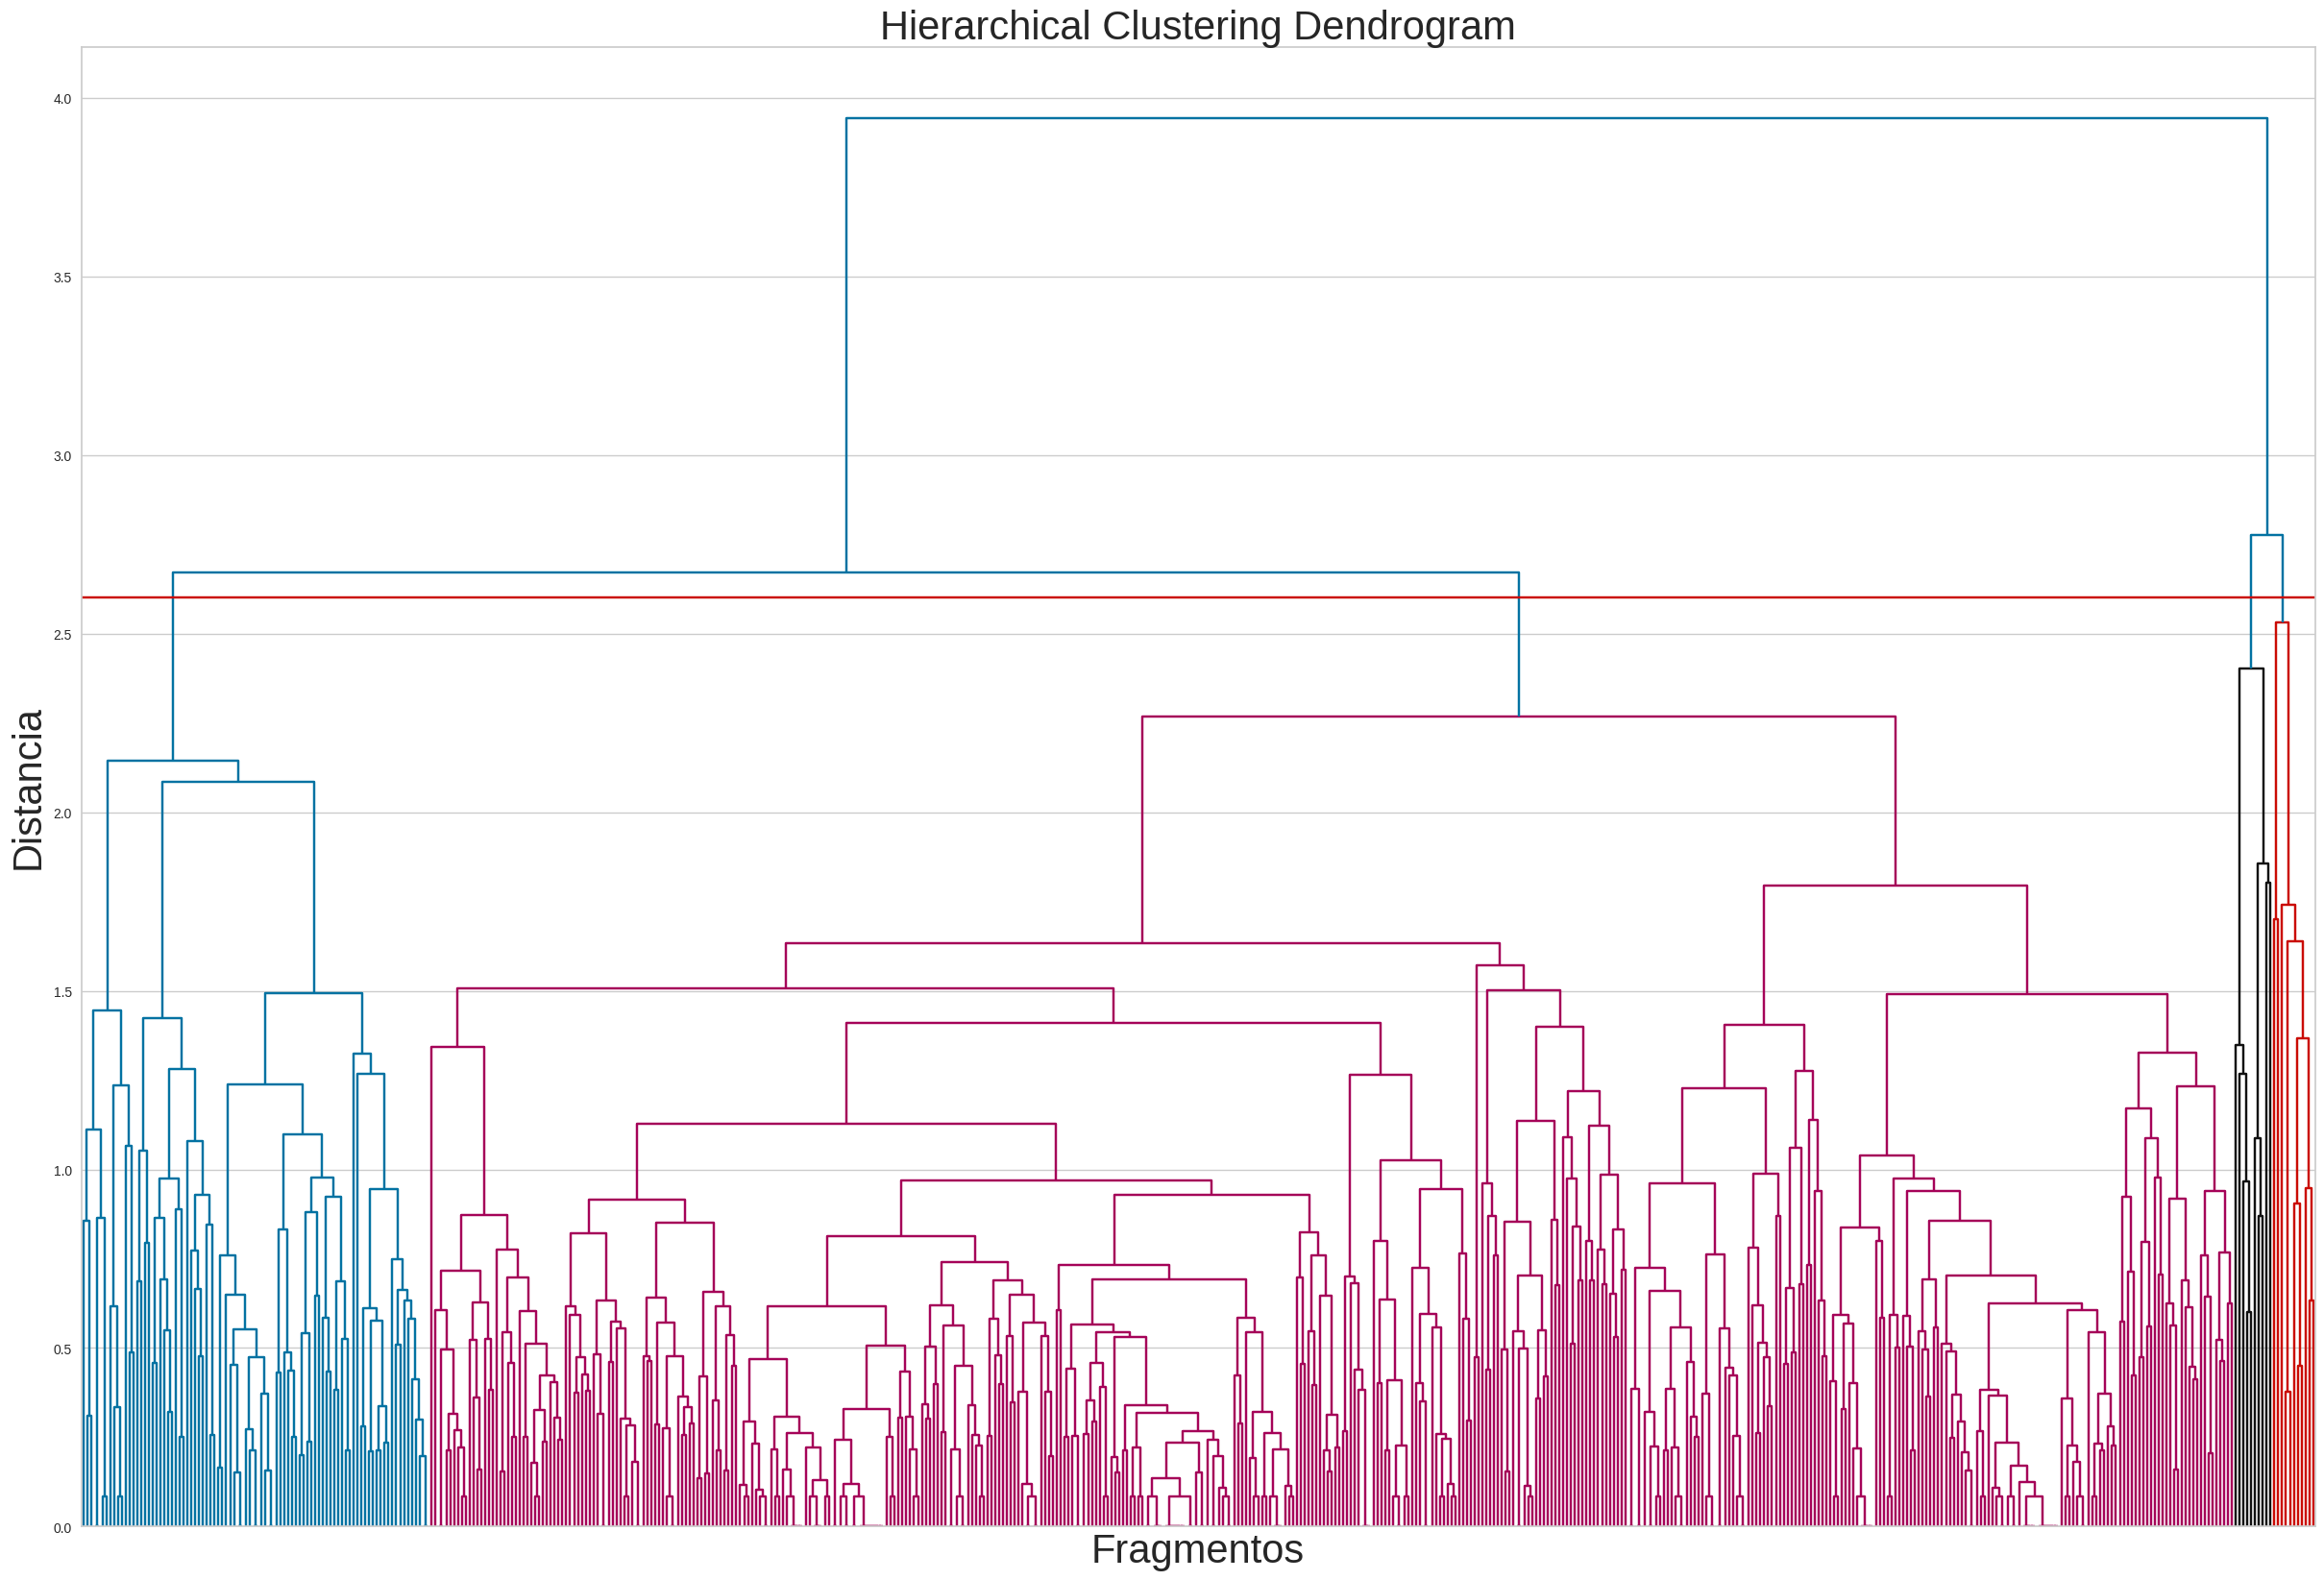

In [15]:
# CLustering jerarquico
max_d= 2.6
Z = linkage(D, 'average')
set_link_color_palette(['b', 'm', 'k', 'r'])
fig = plt.figure(figsize=(30, 20), linewidth=2)

dn = dendrogram(Z, color_threshold=max_d, no_labels=True)
plt.axhline(y=max_d, xmin=0, xmax=577, color='r')
plt.title('Hierarchical Clustering Dendrogram',fontsize=30)
plt.xlabel('Fragmentos', fontsize=30)
plt.ylabel('Distancia', fontsize=30)
#plt.savefig("/home/dsg/Escritorio/CCA2024/figures/dendrograma.png",bbox_inches='tight')
plt.show()



In [17]:
# Elección del nivel de corte del dendrográma para establece rnúmero de grupos
clu = fcluster(Z, max_d, criterion='distance')
clusters = pd.Series(clu)
#Cantidad de fragmentos agrupado en cada clúster
clusters.value_counts(ascending=[False])

2    467
1     90
4     11
3     10
dtype: int64

In [18]:
df['cluster'] = clusters
df.head()

,Unnamed: 0,Coccion,T_desgrasante,Composicion,Densidad,Textura,Grosor₍mm),Tamaño(cm),Acabado_Interno,Acabado_Externo,Dureza,Ahumado,Tecnica,Elemento₁,Localizacion,Baño,Engobe,cluster
0,0,1,2,5,1,0,7,3,2,2,0,0,0,0,0,0,0,1
1,1,0,2,6,0,0,12,5,2,2,0,0,0,0,0,0,0,2
2,2,0,2,6,0,0,8,3,2,2,0,0,0,0,0,0,0,2
3,3,0,2,6,1,0,10,3,1,1,1,0,0,0,0,0,0,1
4,4,0,1,6,0,0,7,3,1,2,0,0,2,1,1,0,0,2


**Como resultado de la implementación del algoritmo no-supervisado de agrupamiento jerárquico tenemos ahora una nueva columna en nuestro dataset que permite asociar cada fragmento a uno de los cuatro clusters ("tipos") creados.
Lo guardamos para la siguiente fase**


In [19]:
df.to_csv('./intermediate_data/datos_supervisado.csv')

El [coeficiente de correlación cofenética](https://en.wikipedia.org/wiki/Cophenetic_correlation) es usado como una heurística para medir la fidelidad con la que un dendrograma preserva las distancias entre pares entre los puntos de datos originales no modelados.

Como ejercicio hemos experimentado con los diferentes métodos de agrupamamiento disponible. La intuición detras de este ejercicio es que el mayor valor en el computo del coeficiente indica una mayor fidelidad en el agrupamiento creado

In [9]:
#Coeficiente cofenético para evaluar el grado de "exactitud" del método de agrupación usado

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(Z, pdist(D))
c

0.649767838082807

In [10]:
df = pd.DataFrame({"cophenetic":[0.71, 0.81, 0.83, 0.65]},
                  index=["Single", "Average", "Complete", "Ward"])
df

,cophenetic
Single,0.71
Average,0.81
Complete,0.83
Ward,0.65


In [ ]:
df['cophenetic'].mean()

df.loc["media"] = df.mean(axis=0)
df.loc["mediana"] = df.median(axis=0)


In [ ]:
df.to_csv('./intermediate_data/cophenetic_correlation.csv')